# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = "IAD32"
COLLABORATORS = "Marcin Słyś 408197, Michał Surówka 402299, Karol Śliwa 406441"

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 3/4)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Wczytanie danych
Wczytaj dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i  weather_data.pkl do tablic `daily_bike_traffic_data` oraz `weather_data`.

Wyświetl przygotowane tablice.

In [3]:
# Ruch rowerowy
# YOUR CODE HERE
daily_bike_traffic_data = pd.read_pickle('daily_bike_traffic_data.pkl')
daily_bike_traffic_data.style.format(precision=0).hide(axis=0, subset=daily_bike_traffic_data.index[10:])

,Total,East,West
Date,,,
2022-01-01,33,23,10
2022-01-02,37,20,17
2022-01-03,253,93,160
2022-01-04,577,220,357
2022-01-05,713,261,452
2022-01-06,588,231,357
2022-01-07,650,250,400
2022-01-08,1147,548,599
2022-01-09,1923,912,1011


In [4]:
# Pogoda
# YOUR CODE HERE
weather_data = pd.read_pickle('weather_data.pkl')
weather_data.style.format(precision=2).hide(axis=0, subset=weather_data.index[10:-10])

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [5]:
# Tabela R
# YOUR CODE HERE
R_corr_1 = pd.DataFrame(index=weather_data.columns, columns=daily_bike_traffic_data.columns)

for col in R_corr_1.columns:
        R_corr_1[col] = weather_data.corrwith(daily_bike_traffic_data[col], method='pearson')
        
R_corr_1.style.format(precision=3)

In [6]:
# Tabela R^2
# YOUR CODE HERE
R2_corr_1 = R_corr_1 ** 2
R2_corr_1.style.format(precision=3)

In [7]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

Text(0.5, 1.0, 'R^2')

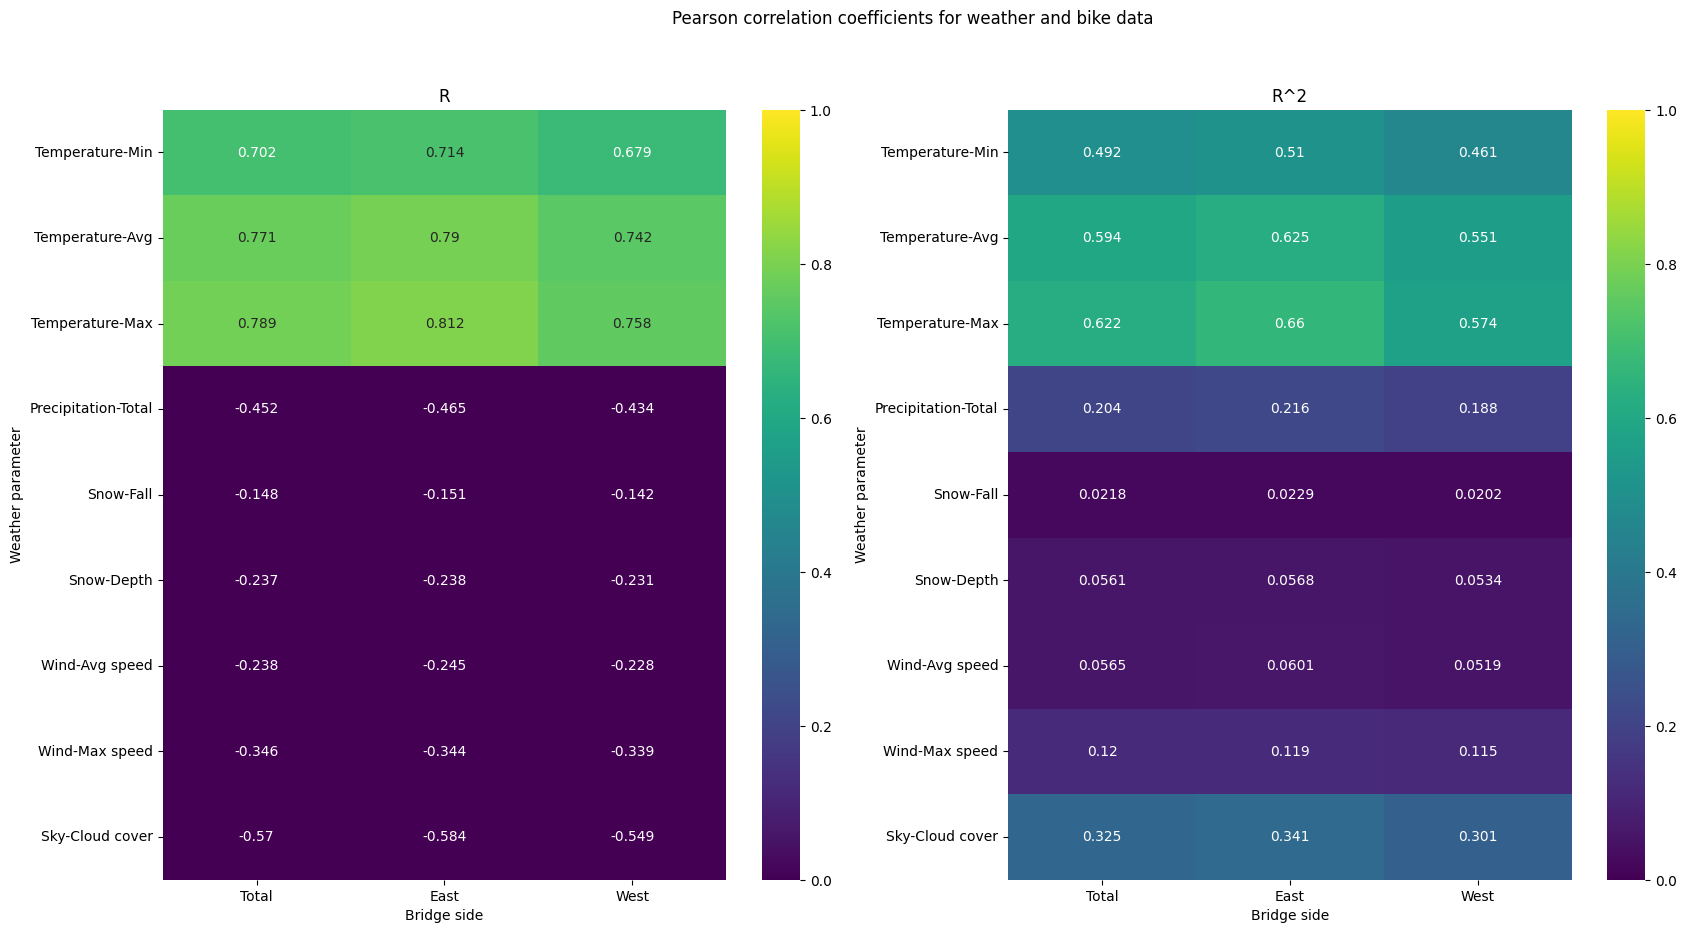

In [8]:
# Wykresy
# YOUR CODE HERE
fig, ax = plt.subplots(1, 2, figsize=(20,10))
# dodac tytuly
# dodac opisy osi
fig.suptitle('Pearson correlation coefficients for weather and bike data')

sns.heatmap(R_corr_1, annot=True, cmap='viridis', ax=ax[0], fmt='.3g', vmin=0, vmax=1)
ax[0].set_ylabel("Weather parameter")
ax[0].set_xlabel("Bridge side")
ax[0].set_title("R")

sns.heatmap(R2_corr_1, annot=True, cmap='viridis', ax=ax[1], fmt='.3g', vmin=0, vmax=1)
ax[1].set_ylabel("Weather parameter")
ax[1].set_xlabel("Bridge side")
ax[1].set_title("R^2")

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [9]:
# Tablica R
# YOUR CODE HERE
R_corr_2 = pd.DataFrame(index=weather_data.columns, columns=weather_data.columns)

for category, column in R_corr_2.columns:
    R_corr_2[category, column] = weather_data.corrwith(weather_data[category, column])
    
R_corr_2.style.format(precision=3)

In [10]:
# Tablica R^2
# YOUR CODE HERE
R2_corr_2 = R_corr_2 ** 2
R2_corr_2.style.format(precision=3)

In [11]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

Text(0.5, 1.0, 'R^2')

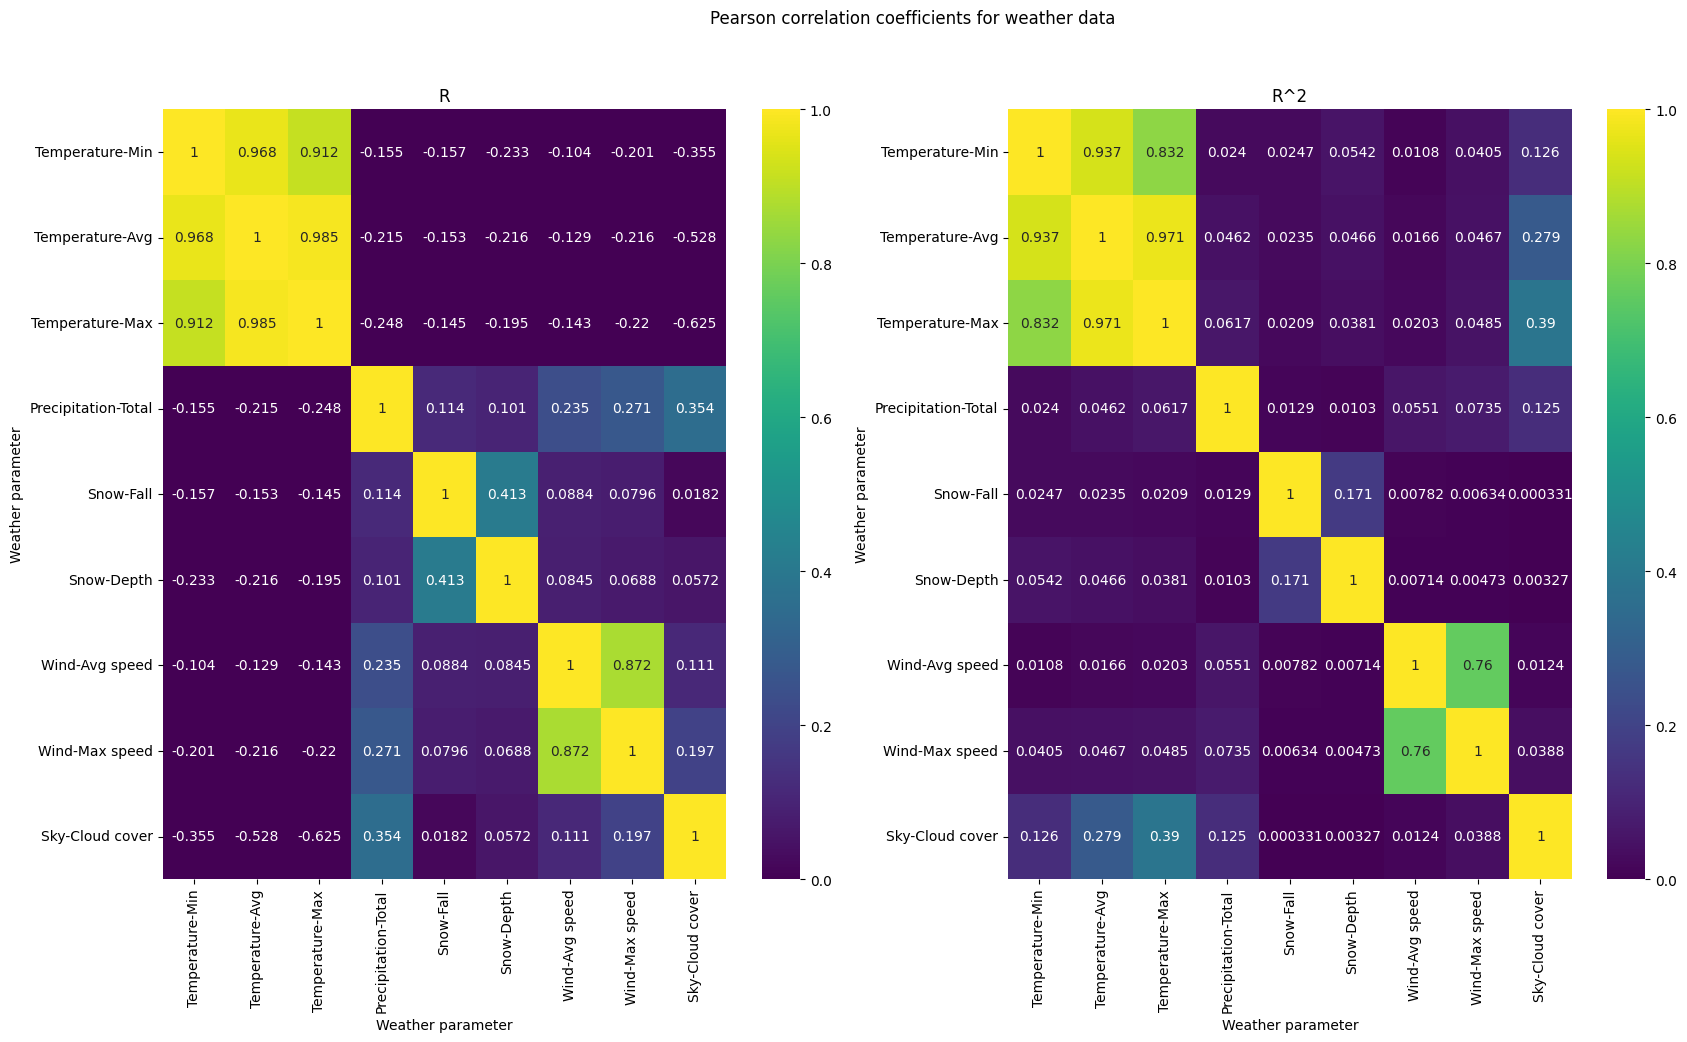

In [12]:
# Wykresy
# YOUR CODE HERE
fig, ax = plt.subplots(1, 2, figsize=(20,10))

fig.suptitle('Pearson correlation coefficients for weather data')

sns.heatmap(R_corr_2, annot=True, cmap='viridis', ax=ax[0], fmt='.3g', vmin=0, vmax=1)
ax[0].set_ylabel("Weather parameter")
ax[0].set_xlabel("Weather parameter")
ax[0].set_title("R")

sns.heatmap(R2_corr_2, annot=True, cmap='viridis', ax=ax[1], fmt='.3g', vmin=0, vmax=1)
ax[1].set_ylabel("Weather parameter")
ax[1].set_xlabel("Weather parameter")
ax[1].set_title("R^2")

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [13]:
# Tabela
# YOUR CODE HERE
ab = ['a', 'b']
cols = daily_bike_traffic_data.columns
columns = pd.MultiIndex.from_product([cols, ab])
regression_data_1 = pd.DataFrame(index=weather_data.columns, columns=columns)

for col in daily_bike_traffic_data.columns:
    for cat, col2 in weather_data.columns:
        temp = pd.DataFrame({'wd': weather_data[cat, col2], 'dbtd': daily_bike_traffic_data[col]})
        temp = temp.dropna()
        reg_data = sp.stats.linregress(temp['wd'], temp['dbtd'])
        regression_data_1.loc[cat, col2][col, 'a'] = reg_data.slope
        regression_data_1.loc[cat, col2][col, 'b'] = reg_data.intercept

temp = pd.DataFrame({'wd': weather_data['Snow', 'Depth'], 'dbtd': daily_bike_traffic_data['Total']})
temp = temp.dropna()
sp.stats.linregress(temp['wd'], temp['dbtd'])

regression_data_1.style.format(precision=3)

In [14]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

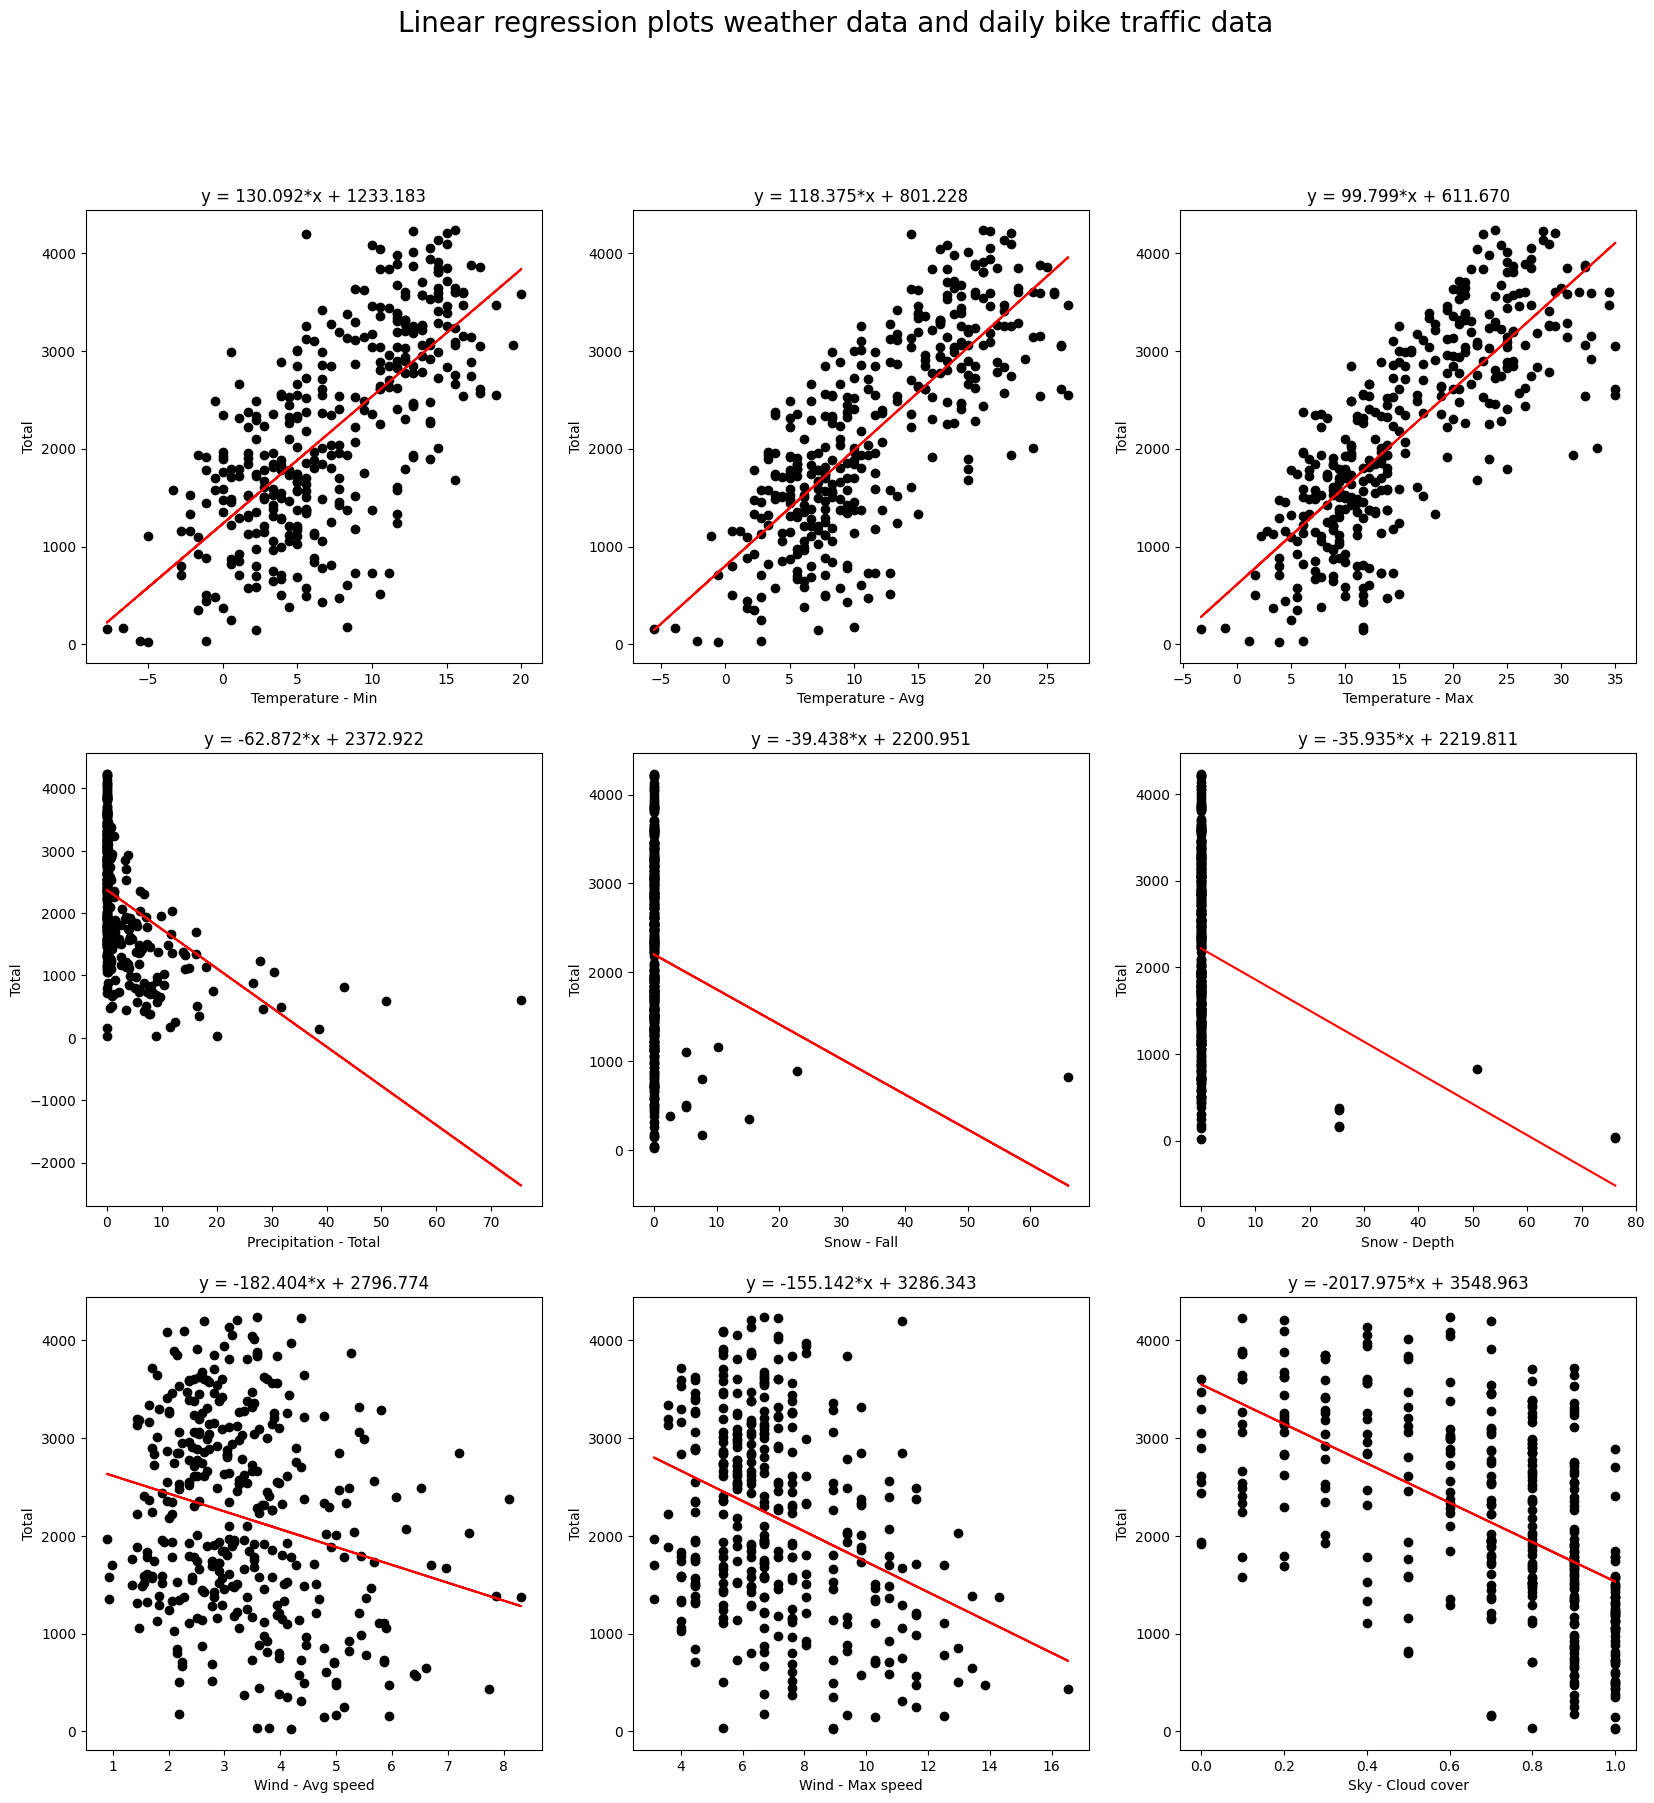

In [16]:
# Wykresy
# YOUR CODE HERE
def reg_func(x, a, b):
    return a * x + b

fig, ax = plt.subplots(3, 3, figsize=(20,20))

fig.suptitle('Linear regression plots weather data and daily bike traffic data', fontsize=20)

i = 0
for cat, col2 in weather_data.columns:
    temp = pd.DataFrame({'wd': weather_data[cat, col2], 'dbtd': daily_bike_traffic_data['Total']})
    temp = temp.dropna()
    a = regression_data_1.loc[cat, col2]['Total', 'a']
    b = regression_data_1.loc[cat, col2]['Total', 'b']
    y_pred = reg_func(temp['wd'], a, b)
    ax[i // 3][i % 3].scatter(temp['wd'], temp['dbtd'], color='black')
    ax[i // 3][i % 3].plot(temp['wd'], y_pred, color='red')
    ax[i // 3][i % 3].set_xlabel(cat+" - "+col2)
    ax[i // 3][i % 3].set_ylabel('Total')
    ax[i // 3][i % 3].set_title("y = "+"{:.3f}".format(a)+"*x + "+"{:.3f}".format(b))
    i = i + 1

#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [17]:
# Tabela
# YOUR CODE HERE
ab = ['a', 'b', 'c']
cols = daily_bike_traffic_data.columns
columns = pd.MultiIndex.from_product([cols, ab])
weather_data_pre_sky = weather_data[["Precipitation", "Sky"]]
regression_data_2 = pd.DataFrame(index=weather_data_pre_sky.columns, columns=columns)

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

for col in daily_bike_traffic_data.columns:
    for cat, col2 in weather_data_pre_sky.columns:
        temp = pd.DataFrame({'wd': weather_data_pre_sky[cat, col2], 'dbtd': daily_bike_traffic_data[col]})
        temp = temp.dropna()
        if cat == 'Precipitation':
            precipitation_idx = np.argsort(temp['wd'])[-10:]
            mean_y = np.mean(temp['dbtd'][precipitation_idx])
            c_lower = mean_y * 0.9
            c_upper = mean_y * 1.1
        else:
            c_lower = -np.inf
            c_upper = np.inf     
        params, covariance = sp.optimize.curve_fit(exponential_func, xdata=temp['wd'], ydata=temp['dbtd'],
                                                  bounds=([-np.inf, -np.inf, c_lower], [np.inf, np.inf, c_upper]))
        regression_data_2.loc[cat, col2][col, 'a'] = params[0]
        regression_data_2.loc[cat, col2][col, 'b'] = params[1]
        regression_data_2.loc[cat, col2][col, 'c'] = params[2]

regression_data_2.style.format(precision=3)

In [18]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

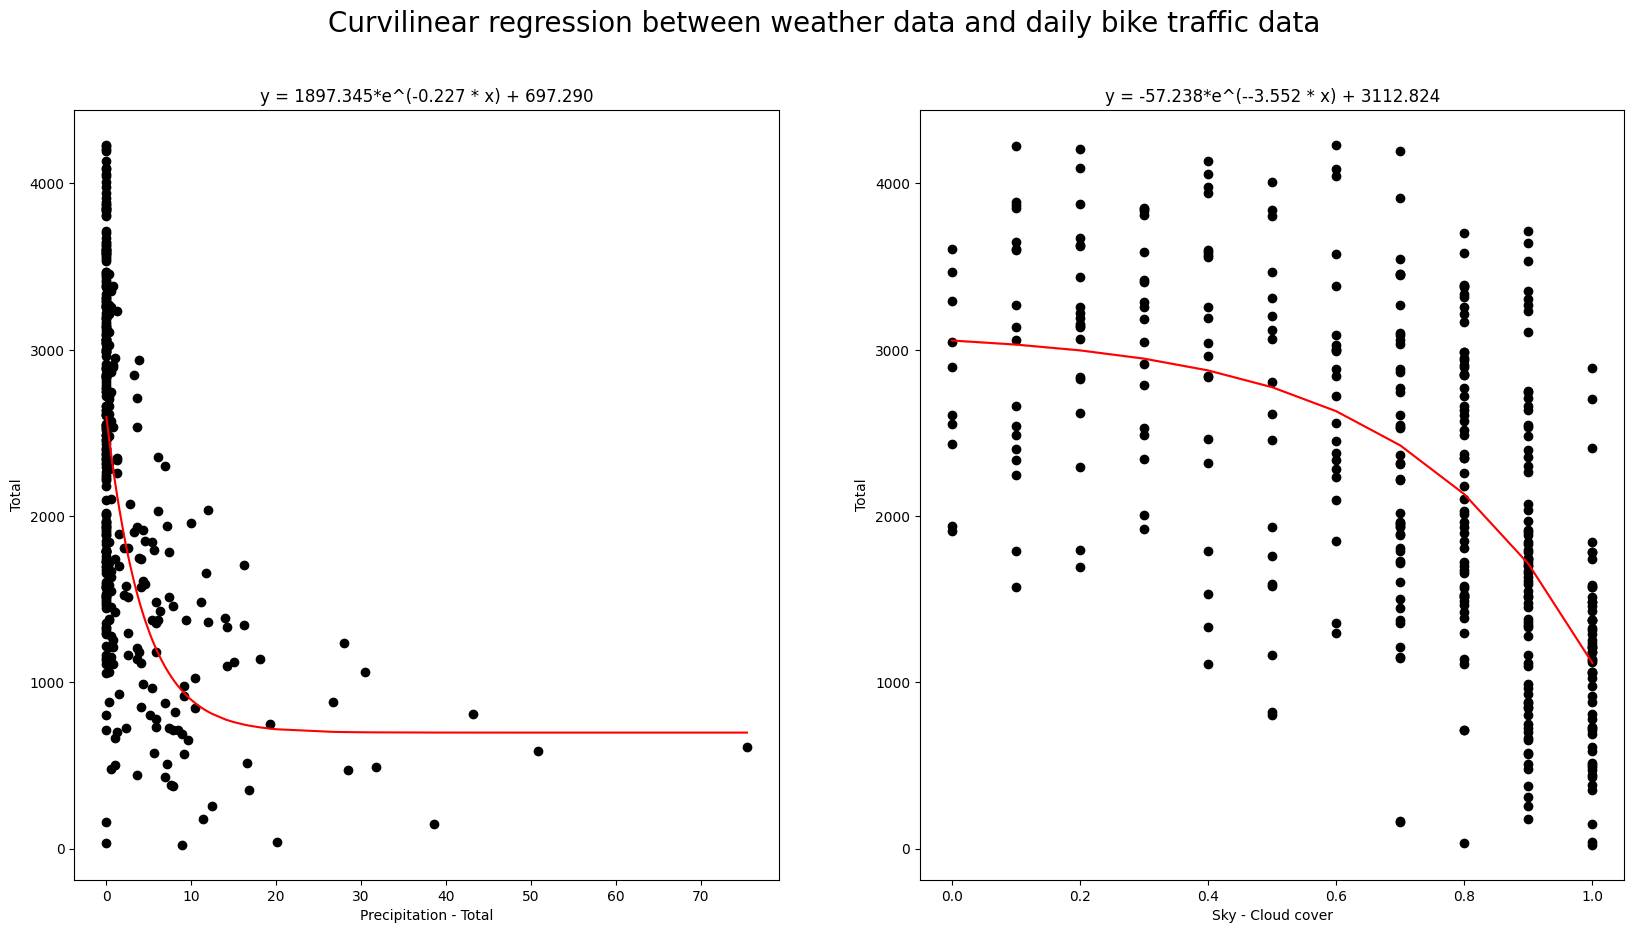

In [19]:
# Wykres
# YOUR CODE HERE
weather_data_pre_sky = weather_data[["Precipitation", "Sky"]]

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle('Curvilinear regression between weather data and daily bike traffic data', fontsize=20)

i = 0
for cat, col2 in weather_data_pre_sky.columns:
    temp = pd.DataFrame({'wd': weather_data_pre_sky[cat, col2], 'dbtd': daily_bike_traffic_data['Total']})
    temp = temp.dropna()
    a = regression_data_2.loc[cat, col2]['Total', 'a']
    b = regression_data_2.loc[cat, col2]['Total', 'b']
    c = regression_data_2.loc[cat, col2]['Total', 'c']
    y_pred = exponential_func(temp['wd'], a, b, c)
    ax[i].scatter(temp['wd'], temp['dbtd'], color='black')
    sns.lineplot(x=temp['wd'], y=y_pred, ax=ax[i], color='red')
    ax[i].set_xlabel(cat+" - "+col2)
    ax[i].set_ylabel('Total')
    ax[i].set_title("y = "+"{:.3f}".format(a)+"*e^(-"+"{:.3f}".format(b)+ " * x) + "+"{:.3f}".format(c))
    i = i + 1